## Final Project Submission

Please fill out:
* Student name: Minna Fingerhood
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Fangfang
* Blog post URL:


In [ ]:
# Your code here - remember to use markdown cells for comments as well!

In [ ]:
#how does date affect the price of houses?
#heatmap of lat/long at house prices?
#how does bathroom and square footage -- high correlation demonstrated by heatmap 

assingment: 
    - You'll clean, explore, and model this dataset with a multivariate linear regression to predict the sale price of houses as accurately as possible. 

questions to keep in mind:

    -"how did you pick the question(s) that you did?"
    -"why are these questions important from a business perspective?"
    -"how did you decide on the data cleaning options you performed?"
    -"why did you choose a given method or library?"
    -"why did you select those visualizations and what did you learn from each of them?"
    -"why did you pick those features as predictors?"
    -"how would you interpret the results?"
    -"how confident are you in the predictive quality of the results?"
    -"what are some of the things that could cause the results to be wrong?"

In [81]:
#import data and packages
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.formula.api as smf
%matplotlib inline


In [43]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [45]:
#data cleaning code: 

#duplicates are a result of the same house being sold another time... Therefore do not need to delete 
df[df.id.duplicated(keep=False)].head()

#yr_renovated column has both nan and 0.0 filler values... changes all to nan so 0.0 doesn't skew the data 
df['yr_renovated'] = df['yr_renovated'].replace(0.0, np.nan)


#Should replace null values with 0 because categorical for the column.
#going to try with converting null values to 0.0
df['waterfront'] = df['waterfront'].fillna(0.0)

#had to apply log function to columns(price, sqft_above, sqft_living)

#sqft_basement was in string format, so had to convert and then replaced 0.0 with null to find median without skewed outliers
#used median to replace null values so that it did not alter mean too much... mean went from 740 to 716 once we replaced 
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors='coerce')
df['sqft_basement'] = df['sqft_basement'].replace(0.0, np.nan)
df['sqft_basement'] = df['sqft_basement'].fillna(df['sqft_basement'].median())

## made graphs determining the frequency of each variable as well as heat map for correlation (looked specifically at price row)
##need to figure out which ones to use in model by determining which are most evenly distributed and most correlated to price 
df.corr()[abs(df.corr() > 0.75)] #determining high correlations 

#found that bathrooms, seqft_living, grade, sqft_above, sqft_living15 are most correlated to price 





In [49]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,NaN,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,NaN,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,NaN,98074,47.6168,-122.045,1800,7503


In [51]:
df.view.value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [48]:
df.view.value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [4]:
#Inspecting Data: Waterfront and yr_renovated have a lot of null objects... 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [11]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [13]:
#check & inspect duplicates
df[df.id.duplicated(keep=False)].head()
#duplicates are a result of the same house being sold another time... Therefore do not need to delete 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,7/25/2014,430000.0,3,1.50,1580,5000,1.0,0.0,0.0,...,8,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
94,6021501535,12/23/2014,700000.0,3,1.50,1580,5000,1.0,0.0,0.0,...,8,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
313,4139480200,6/18/2014,1380000.0,4,3.25,4290,12103,1.0,0.0,3.0,...,11,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
314,4139480200,12/9/2014,1400000.0,4,3.25,4290,12103,1.0,0.0,3.0,...,11,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
324,7520000520,9/5/2014,232000.0,2,1.00,1240,12092,1.0,NaN,0.0,...,6,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460


In [ ]:
#Cleaning Data!! 

In [15]:
#yr_renovated column has both nan and 0.0 filler values... changes all to nan so 0.0 doesn't skew the data 
df['yr_renovated'] = df['yr_renovated'].replace(0.0, np.nan)

In [16]:
df['yr_renovated'].describe()

count     744.000000
mean     1995.928763
std        15.599946
min      1934.000000
25%      1987.000000
50%      2000.000000
75%      2007.250000
max      2015.000000
Name: yr_renovated, dtype: float64

In [38]:
#df.waterfront.value_counts() #for waterfronts we have 19075 entries for 0.0
#df.waterfront.isnull().value_counts() #we also have 2376 null values... Should replace null values with 0 because categorical for the column. But are null values the same as no waterfront or was the information just unavailable?
#df[df.waterfront.isnull()].head()
#going to try with converting null values to 0.0
df['waterfront'] = df['waterfront'].fillna(0.0)


In [40]:
df.waterfront.isnull().value_counts()

False    21597
Name: waterfront, dtype: int64

In [107]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [134]:
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors='coerce')
df['sqft_basement'] = df['sqft_basement'].replace(0.0, np.nan)
df['sqft_basement'] = df['sqft_basement'].fillna(df['sqft_basement'].median())

In [137]:
df['sqft_basement'].describe()

count    21597.000000
mean       716.146733
std        252.000781
min         10.000000
25%        700.000000
50%        700.000000
75%        700.000000
max       4820.000000
Name: sqft_basement, dtype: float64

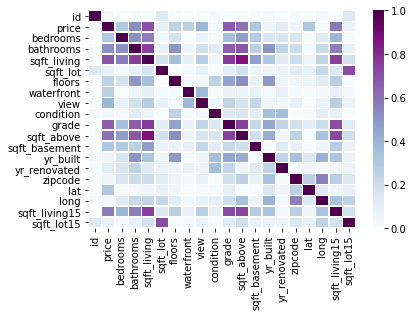

In [171]:

fig = sns.heatmap(abs(df.corr()), cmap = 'BuPu', linewidth = .5)
fig


In [79]:
df.groupby('bathrooms').price.describe()

,count,mean,std,min,25%,50%,75%,max
bathrooms,,,,,,,,
0.50,4.0,2.373750e+05,8.888886e+04,109000.0,218500.0,264000.0,282875.0,312500.0
0.75,71.0,2.949366e+05,1.390220e+05,80000.0,201000.0,275000.0,355000.0,785000.0
1.00,3851.0,3.470721e+05,1.545674e+05,78000.0,230000.0,320000.0,425000.0,1300000.0
1.25,9.0,6.217722e+05,4.088817e+05,275000.0,360000.0,516500.0,545000.0,1390000.0
1.50,1445.0,4.094297e+05,1.939307e+05,107000.0,265950.0,370000.0,495800.0,1500000.0
1.75,3048.0,4.549158e+05,2.020492e+05,115000.0,310000.0,422900.0,555000.0,3280000.0
2.00,1930.0,4.579050e+05,2.060723e+05,115000.0,300500.0,423250.0,563000.0,2200000.0
2.25,2047.0,5.337688e+05,2.811597e+05,160000.0,339975.0,472500.0,625000.0,2400000.0
2.50,5377.0,5.538033e+05,2.670712e+05,153503.0,365000.0,499950.0,675000.0,3070000.0


In [99]:
price_vs_bathrooms = smf.ols(formula = 'price~bathrooms+sqft_living+view',data=df).fit()
price_vs_bathrooms.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     8244.
Date:                Tue, 18 Jun 2019   Prob (F-statistic):               0.00
Time:                        16:19:39   Log-Likelihood:            -2.9818e+05
No. Observations:               21534   AIC:                         5.964e+05
Df Residuals:                   21530   BIC:                         5.964e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.666e+04   5031.008     -3.310      0.001   -2.65e+04   -6793.935
bathrooms    1046.9201   3381.581      0.310      0.757   -5581.230    7675.070
sqft_living   255.0653      2.901     87.908      0.000     249.378     260.752
view         1.026e+05   2319.239     44.260      0.000    9.81e+04    1.07e+05
==============================================================================
Omnibus:                    14039.827   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           533664.907
Skew:                           2.600   Prob(JB):                         0.00
Kurtosis:                      26.827   Cond. No.                     7.29e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [100]:
price_vs_sqft_living = smf.ols(formula = 'price~sqft_living',data=df).fit()
price_vs_sqft_living.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Tue, 18 Jun 2019   Prob (F-statistic):               0.00
Time:                        16:22:03   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [101]:
price_vs_sqft_living = smf.ols(formula = 'price~sqft_above+sqft_basement',data=df).fit()
price_vs_sqft_living.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     83.16
Date:                Tue, 18 Jun 2019   Prob (F-statistic):               0.00
Time:                        16:22:24   Log-Likelihood:            -2.9894e+05
No. Observations:               21597   AIC:                         5.985e+05
Df Residuals:                   21292   BIC:                         6.009e+05
Df Model:                         304                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -4.358e+04   4754.983     -9.166      0.000   -5.29e+04   -3.43e+04
sqft_basement[T.10.0]   -3.668e+04   1.77e+05     -0.207      0.836   -3.83e+05     3.1e+05
sqft_basement[T.100.0]   2.254e+05   3.87e+04      5.826      0.000     1.5e+05    3.01e+05
sqft_basement[T.1000.0]  2.879e+05   2.07e+04     13.916      0.000    2.47e+05    3.28e+05
sqft_basement[T.1008.0]  4.447e+04    2.5e+05      0.178      0.859   -4.46e+05    5.35e+05
sqft_basement[T.1010.0]  2.607e+05   3.16e+04      8.248      0.000    1.99e+05    3.23e+05
sqft_basement[T.1020.0]  3.147e+05   3.51e+04      8.964      0.000    2.46e+05    3.83e+05
sqft_basement[T.1024.0] -4.803e+05    2.5e+05     -1.920      0.055   -9.71e+05    1.01e+04
sqft_basement[T.1030.0]    3.4e+05   3.78e+04      9.000      0.000    2.66e+05    4.14e+05
sqft_basement[T.1040.0]  2.886e+05   3.38e+04      8.534      0.000    2.22e+05    3.55e+05
sqft_basement[T.1050.0]  3.436e+05   3.91e+04      8.778      0.000    2.67e+05     4.2e+05
sqft_basement[T.1060.0]  2.409e+05   3.29e+04      7.315      0.000    1.76e+05    3.05e+05
sqft_basement[T.1070.0]  2.676e+05   3.51e+04      7.623      0.000    1.99e+05    3.36e+05
sqft_basement[T.1080.0]  2.318e+05   4.43e+04      5.234      0.000    1.45e+05    3.19e+05
sqft_basement[T.1090.0]  3.413e+05   4.43e+04      7.706      0.000    2.54e+05    4.28e+05
sqft_basement[T.110.0]   1.164e+05    5.9e+04      1.971      0.049     664.079    2.32e+05
sqft_basement[T.1100.0]   2.78e+05   2.84e+04      9.785      0.000    2.22e+05    3.34e+05
sqft_basement[T.1110.0]  3.676e+05   4.23e+04      8.682      0.000    2.85e+05    4.51e+05
sqft_basement[T.1120.0]  3.623e+05   3.82e+04      9.481      0.000    2.87e+05    4.37e+05
sqft_basement[T.1130.0]  3.063e+05   4.57e+04      6.698      0.000    2.17e+05    3.96e+05
sqft_basement[T.1135.0]  1.446e+05    2.5e+05      0.578      0.563   -3.46e+05    6.35e+05
sqft_basement[T.1140.0]  3.698e+05   4.73e+04      7.814      0.000    2.77e+05    4.63e+05
sqft_basement[T.1150.0]  2.166e+05   4.82e+04      4.494      0.000    1.22e+05    3.11e+05
sqft_basement[T.1160.0]  2.429e+05   4.91e+04      4.946      0.000    1.47e+05    3.39e+05
sqft_basement[T.1170.0]  2.547e+05   4.57e+04      5.571      0.000    1.65e+05    3.44e+05
sqft_basement[T.1180.0]  3.729e+05   4.73e+04      7.877      0.000     2.8e+05    4.66e+05
sqft_basement[T.1190.0]  3.189e+05   5.11e+04      6.239      0.000    2.19e+05    4.19e+05
sqft_basement[T.120.0]   1.769e+05   3.45e+04      5.135      0.000    1.09e+05    2.44e+05
sqft_basement[T.1200.0]  2.813e+05   3.02e+04      9.316      0.000    2.22e+05    3.41e+05
sqft_basement[T.1210.0]  1.877e+05    5.9e+04      3.180      0.001     7.2e+04    3.03e+05
sqft_basement[T.1220.0]  3.411e+05    4.5e+04  

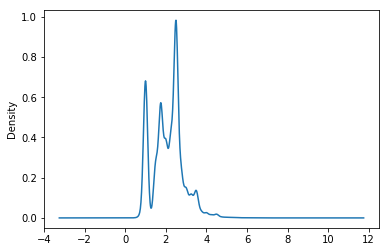

In [89]:
df.bathrooms.plot.kde()

In [ ]:
for i, (name, col) in enumerate(df.iterateitems()):
    

In [147]:
df.zipcode.describe()

count    21597.000000
mean     98077.951845
std         53.513072
min      98001.000000
25%      98033.000000
50%      98065.000000
75%      98118.000000
max      98199.000000
Name: zipcode, dtype: float64

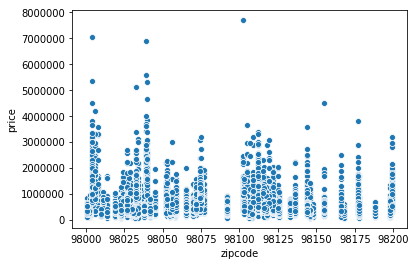

In [148]:
sns.scatterplot(df.zipcode, df.price)

In [143]:
price_vs_size_neighbors = smf.ols(formula = 'price~zipcode',data=df).fit()
price_vs_size_neighbors.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     61.76
Date:                Tue, 18 Jun 2019   Prob (F-statistic):           4.06e-15
Time:                        17:02:24   Log-Likelihood:            -3.0736e+05
No. Observations:               21597   AIC:                         6.147e+05
Df Residuals:                   21595   BIC:                         6.147e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    3.65e+07   4.58e+06      7.977      0.000    2.75e+07    4.55e+07
zipcode     -366.6086     46.649     -7.859      0.000    -458.045    -275.173
==============================================================================
Omnibus:                    19044.296   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1123391.740
Skew:                           4.004   Prob(JB):                         0.00
Kurtosis:                      37.413   Cond. No.                     1.80e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

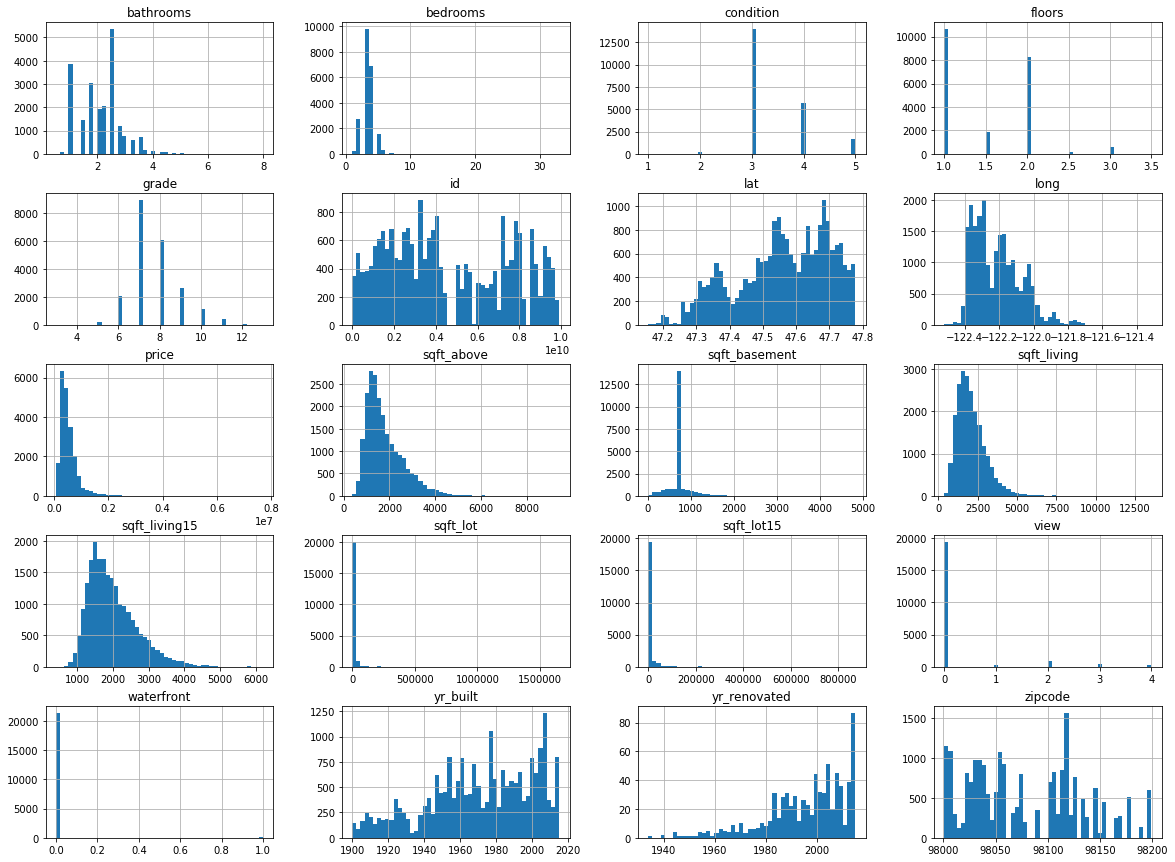

In [157]:
df.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

/Users/minnafingerhood/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


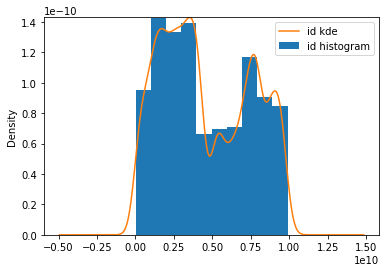

TypeError: Empty 'DataFrame': no numeric data to plot

In [155]:
for column in df:
    df[column].plot.hist(normed=True, label = column+' histogram')
    df[column].plot.kde(label =column+' kde')
    plt.legend()
    plt.show()

In [169]:
df.corr()[(df.corr() > 0.5)]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,NaN,1.000000,NaN,0.525906,0.701917,NaN,NaN,NaN,NaN,NaN,0.667951,0.605368,NaN,NaN,NaN,NaN,NaN,NaN,0.585241,NaN
bedrooms,NaN,NaN,1.000000,0.514508,0.578212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bathrooms,NaN,0.525906,0.514508,1.000000,0.755758,NaN,0.502582,NaN,NaN,NaN,0.665838,0.686668,NaN,0.507173,NaN,NaN,NaN,NaN,0.569884,NaN
sqft_living,NaN,0.701917,0.578212,0.755758,1.000000,NaN,NaN,NaN,NaN,NaN,0.762779,0.876448,NaN,NaN,NaN,NaN,NaN,NaN,0.756402,NaN
sqft_lot,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.718204
floors,NaN,NaN,NaN,0.502582,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.523989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
waterfront,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
view,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [163]:
sqft_vs_others = smf.ols(formula = 'sqft_living~sqft_above+sqft_basement+sqft_living15+sqft_lot15',data=df).fit()
sqft_vs_others.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            sqft_living   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                 3.870e+04
Date:                Tue, 18 Jun 2019   Prob (F-statistic):               0.00
Time:                        17:30:56   Log-Likelihood:            -1.5530e+05
No. Observations:               21597   AIC:                         3.106e+05
Df Residuals:                   21592   BIC:                         3.107e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -507.2030      8.132    -62.373      0.000    -523.142    -491.264
sqft_above        0.7860      0.004    201.905      0.000       0.778       0.794
sqft_basement     1.0833      0.009    119.474      0.000       1.066       1.101
sqft_living15     0.2058      0.005     42.828      0.000       0.196       0.215
sqft_lot15       -0.0002   8.19e-05     -2.925      0.003      -0.000    -7.9e-05
==============================================================================
Omnibus:                     2007.987   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1437.865
Skew:                           0.527   Prob(JB):                         0.00
Kurtosis:                       2.304   Cond. No.                     1.12e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [173]:

model = smf.ols(formula='price ~ bathrooms + sqft_living + grade + sqft_above + sqft_living15', data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     5161.
Date:                Tue, 18 Jun 2019   Prob (F-statistic):               0.00
Time:                        17:51:34   Log-Likelihood:            -2.9890e+05
No. Observations:               21597   AIC:                         5.978e+05
Df Residuals:                   21591   BIC:                         5.979e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -6.52e+05   1.36e+04    -48.079      0.000   -6.79e+05   -6.25e+05
bathrooms     -3.567e+04   3440.363    -10.369      0.000   -4.24e+04   -2.89e+04
sqft_living     245.5631      4.528     54.238      0.000     236.689     254.437
grade          1.119e+05   2470.776     45.293      0.000    1.07e+05    1.17e+05
sqft_above      -80.6961      4.458    -18.101      0.000     -89.434     -71.958
sqft_living15    22.2598      4.032      5.520      0.000      14.356      30.164
==============================================================================
Omnibus:                    17251.912   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1128620.760
Skew:                           3.361   Prob(JB):                         0.00
Kurtosis:                      37.771   Cond. No.                     2.96e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.96e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""